In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns 
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import itertools
from IPython.display import display
from cycler import cycler
import pickle

In [3]:
from scripts.LearningAlgorithms import *
from scripts.FeatureSelection import *

In [4]:
# Ajust matplotlib style Function
class CustomMatplotlibStyle:
    def __init__(self, custom_colors=None, legend_fontsize=10):
        if custom_colors is None:
            custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
        self.set_colors(custom_colors)
        self.set_style()
        self.set_figure_size()
        self.set_grid()
        self.set_line_width()
        self.set_tick_colors()
        self.set_font_size()
        self.set_title_size()
        self.set_legend_fontsize(legend_fontsize)
        self.set_dpi()

    def set_colors(self, custom_colors):
        plt.rcParams["axes.prop_cycle"] = cycler(color=custom_colors)

    def set_style(self):
        plt.style.use("bmh")

    def set_figure_size(self):
        plt.rcParams["figure.figsize"] = (20, 10)

    def set_grid(self):
        plt.rcParams["axes.grid"] = True
        plt.rcParams["grid.color"] = "lightgray"

    def set_line_width(self):
        plt.rcParams["axes.linewidth"] = 1.5

    def set_tick_colors(self):
        plt.rcParams["xtick.color"] = "black"
        plt.rcParams["ytick.color"] = "black"

    def set_font_size(self):
        plt.rcParams["font.size"] = 15

    def set_title_size(self):
        plt.rcParams["figure.titlesize"] = 20

    def set_legend_fontsize(self, legend_fontsize):
        plt.rcParams["legend.fontsize"] = legend_fontsize

    def set_dpi(self):
        plt.rcParams["figure.dpi"] = 100

custom_style = CustomMatplotlibStyle(legend_fontsize=8)


# Read Data 

In [5]:
df = pd.read_pickle(f'../data/processed/5b_feature_engineering_clustered_data.pkl')
df

,mean_xc,mean_yc,mean_zc,mean_xg,mean_yg,mean_zg,posture,types,specimen,set,...,gyro_sqrt_pse,gyro_sqrt_freq_0.0_Hz_ws_14,gyro_sqrt_freq_0.357_Hz_ws_14,gyro_sqrt_freq_0.714_Hz_ws_14,gyro_sqrt_freq_1.071_Hz_ws_14,gyro_sqrt_freq_1.429_Hz_ws_14,gyro_sqrt_freq_1.786_Hz_ws_14,gyro_sqrt_freq_2.143_Hz_ws_14,gyro_sqrt_freq_2.5_Hz_ws_14,cluster
time,,,,,,,,,,,,,,,,,,,,,
2024-02-11 17:08:08.000,-0.171720,0.899881,-0.169511,3.774166,-9.224335,26.319263,bench,heavy,B,64.0,...,0.400390,169.957158,-22.769665,17.850271,6.699009,-28.838380,1.172824,-28.214163,-6.688060,1
2024-02-11 17:08:08.400,-0.025599,0.868121,-0.058455,6.531859,-2.034554,1.905407,bench,heavy,B,64.0,...,0.338735,193.273377,-16.005057,-42.348706,-21.319861,19.104626,-3.092371,3.106451,-2.540710,1
2024-02-11 17:08:08.800,-0.062526,0.990899,-0.034507,-1.000984,-1.663903,-0.937159,bench,heavy,B,64.0,...,0.382233,189.337639,-24.862902,-32.398674,8.205980,-24.240179,-10.556393,19.848106,-7.164922,1
2024-02-11 17:08:09.200,-0.045753,0.976997,-0.037550,4.534213,-3.075271,2.630137,bench,heavy,B,64.0,...,0.447621,185.520071,-17.510089,48.136639,6.703348,27.660469,14.735488,12.349908,-5.934444,1
2024-02-11 17:08:09.600,-0.046297,0.906045,-0.056705,1.308300,2.464768,-4.722314,bench,heavy,B,64.0,...,0.328161,150.511413,-22.125228,17.002075,-6.599336,-10.310644,8.862907,-13.328693,-15.904520,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-20 19:33:26.200,0.063193,-0.942315,0.107890,-26.048703,8.594212,15.067990,row,medium,E,71.0,...,0.268295,307.024981,10.671412,-45.269619,12.890568,-29.181884,-21.399785,-11.857030,-31.989505,0
2024-02-20 19:33:26.600,-0.023519,-1.200629,-0.109648,-3.410697,-1.614197,6.195765,row,medium,E,71.0,...,0.198346,315.207393,9.031439,-5.194140,-5.327670,15.552368,58.996852,18.923583,2.574359,2
2024-02-20 19:33:27.000,-0.043888,-0.983254,-0.062298,2.477314,-4.130471,0.211078,row,medium,E,71.0,...,0.268683,271.566446,-41.387135,24.866771,-5.636720,3.919922,-42.768100,-0.973890,-2.617110,2


# Creating Training & Testing  Data 

In [6]:
df.columns

Index(['mean_xc', 'mean_yc', 'mean_zc', 'mean_xg', 'mean_yg', 'mean_zg',
       'posture', 'types', 'specimen ', 'set',
       ...
       'gyro_sqrt_pse', 'gyro_sqrt_freq_0.0_Hz_ws_14',
       'gyro_sqrt_freq_0.357_Hz_ws_14', 'gyro_sqrt_freq_0.714_Hz_ws_14',
       'gyro_sqrt_freq_1.071_Hz_ws_14', 'gyro_sqrt_freq_1.429_Hz_ws_14',
       'gyro_sqrt_freq_1.786_Hz_ws_14', 'gyro_sqrt_freq_2.143_Hz_ws_14',
       'gyro_sqrt_freq_2.5_Hz_ws_14', 'cluster'],
      dtype='object', length=121)

In [7]:
df_train = df.drop(['specimen ' , 'types' , 'set'], axis= 1)
df_train

,mean_xc,mean_yc,mean_zc,mean_xg,mean_yg,mean_zg,posture,duration_time,pca_1,pca_2,...,gyro_sqrt_pse,gyro_sqrt_freq_0.0_Hz_ws_14,gyro_sqrt_freq_0.357_Hz_ws_14,gyro_sqrt_freq_0.714_Hz_ws_14,gyro_sqrt_freq_1.071_Hz_ws_14,gyro_sqrt_freq_1.429_Hz_ws_14,gyro_sqrt_freq_1.786_Hz_ws_14,gyro_sqrt_freq_2.143_Hz_ws_14,gyro_sqrt_freq_2.5_Hz_ws_14,cluster
time,,,,,,,,,,,,,,,,,,,,,
2024-02-11 17:08:08.000,-0.171720,0.899881,-0.169511,3.774166,-9.224335,26.319263,bench,16.0,-12.431003,19.194352,...,0.400390,169.957158,-22.769665,17.850271,6.699009,-28.838380,1.172824,-28.214163,-6.688060,1
2024-02-11 17:08:08.400,-0.025599,0.868121,-0.058455,6.531859,-2.034554,1.905407,bench,16.0,4.051732,2.714509,...,0.338735,193.273377,-16.005057,-42.348706,-21.319861,19.104626,-3.092371,3.106451,-2.540710,1
2024-02-11 17:08:08.800,-0.062526,0.990899,-0.034507,-1.000984,-1.663903,-0.937159,bench,16.0,-0.483603,-1.765676,...,0.382233,189.337639,-24.862902,-32.398674,8.205980,-24.240179,-10.556393,19.848106,-7.164922,1
2024-02-11 17:08:09.200,-0.045753,0.976997,-0.037550,4.534213,-3.075271,2.630137,bench,16.0,1.961752,3.143719,...,0.447621,185.520071,-17.510089,48.136639,6.703348,27.660469,14.735488,12.349908,-5.934444,1
2024-02-11 17:08:09.600,-0.046297,0.906045,-0.056705,1.308300,2.464768,-4.722314,bench,16.0,3.725008,-6.004046,...,0.328161,150.511413,-22.125228,17.002075,-6.599336,-10.310644,8.862907,-13.328693,-15.904520,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-20 19:33:26.200,0.063193,-0.942315,0.107890,-26.048703,8.594212,15.067990,row,19.0,-29.785541,-11.486676,...,0.268295,307.024981,10.671412,-45.269619,12.890568,-29.181884,-21.399785,-11.857030,-31.989505,0
2024-02-20 19:33:26.600,-0.023519,-1.200629,-0.109648,-3.410697,-1.614197,6.195765,row,19.0,-6.533553,0.745641,...,0.198346,315.207393,9.031439,-5.194140,-5.327670,15.552368,58.996852,18.923583,2.574359,2
2024-02-20 19:33:27.000,-0.043888,-0.983254,-0.062298,2.477314,-4.130471,0.211078,row,19.0,1.621374,2.037572,...,0.268683,271.566446,-41.387135,24.866771,-5.636720,3.919922,-42.768100,-0.973890,-2.617110,2


In [8]:
X = df_train.drop(['posture'], axis=1)
Y = df_train['posture']

In [9]:
X

,mean_xc,mean_yc,mean_zc,mean_xg,mean_yg,mean_zg,duration_time,pca_1,pca_2,pca_3,...,gyro_sqrt_pse,gyro_sqrt_freq_0.0_Hz_ws_14,gyro_sqrt_freq_0.357_Hz_ws_14,gyro_sqrt_freq_0.714_Hz_ws_14,gyro_sqrt_freq_1.071_Hz_ws_14,gyro_sqrt_freq_1.429_Hz_ws_14,gyro_sqrt_freq_1.786_Hz_ws_14,gyro_sqrt_freq_2.143_Hz_ws_14,gyro_sqrt_freq_2.5_Hz_ws_14,cluster
time,,,,,,,,,,,,,,,,,,,,,
2024-02-11 17:08:08.000,-0.171720,0.899881,-0.169511,3.774166,-9.224335,26.319263,16.0,-12.431003,19.194352,13.784280,...,0.400390,169.957158,-22.769665,17.850271,6.699009,-28.838380,1.172824,-28.214163,-6.688060,1
2024-02-11 17:08:08.400,-0.025599,0.868121,-0.058455,6.531859,-2.034554,1.905407,16.0,4.051732,2.714509,3.197879,...,0.338735,193.273377,-16.005057,-42.348706,-21.319861,19.104626,-3.092371,3.106451,-2.540710,1
2024-02-11 17:08:08.800,-0.062526,0.990899,-0.034507,-1.000984,-1.663903,-0.937159,16.0,-0.483603,-1.765676,-1.733883,...,0.382233,189.337639,-24.862902,-32.398674,8.205980,-24.240179,-10.556393,19.848106,-7.164922,1
2024-02-11 17:08:09.200,-0.045753,0.976997,-0.037550,4.534213,-3.075271,2.630137,16.0,1.961752,3.143719,2.174345,...,0.447621,185.520071,-17.510089,48.136639,6.703348,27.660469,14.735488,12.349908,-5.934444,1
2024-02-11 17:08:09.600,-0.046297,0.906045,-0.056705,1.308300,2.464768,-4.722314,16.0,3.725008,-6.004046,-0.718233,...,0.328161,150.511413,-22.125228,17.002075,-6.599336,-10.310644,8.862907,-13.328693,-15.904520,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-20 19:33:26.200,0.063193,-0.942315,0.107890,-26.048703,8.594212,15.067990,19.0,-29.785541,-11.486676,4.242451,...,0.268295,307.024981,10.671412,-45.269619,12.890568,-29.181884,-21.399785,-11.857030,-31.989505,0
2024-02-20 19:33:26.600,-0.023519,-1.200629,-0.109648,-3.410697,-1.614197,6.195765,19.0,-6.533553,0.745641,1.978572,...,0.198346,315.207393,9.031439,-5.194140,-5.327670,15.552368,58.996852,18.923583,2.574359,2
2024-02-20 19:33:27.000,-0.043888,-0.983254,-0.062298,2.477314,-4.130471,0.211078,19.0,1.621374,2.037572,-0.961822,...,0.268683,271.566446,-41.387135,24.866771,-5.636720,3.919922,-42.768100,-0.973890,-2.617110,2


In [10]:
Y

time
2024-02-11 17:08:08.000    bench
2024-02-11 17:08:08.400    bench
2024-02-11 17:08:08.800    bench
2024-02-11 17:08:09.200    bench
2024-02-11 17:08:09.600    bench
                           ...  
2024-02-20 19:33:26.200      row
2024-02-20 19:33:26.600      row
2024-02-20 19:33:27.000      row
2024-02-20 19:33:27.400      row
2024-02-20 19:33:27.800      row
Name: posture, Length: 3868, dtype: object

In [11]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size= 0.30 , random_state=42 , stratify= Y)

In [12]:
x_test

,mean_xc,mean_yc,mean_zc,mean_xg,mean_yg,mean_zg,duration_time,pca_1,pca_2,pca_3,...,gyro_sqrt_pse,gyro_sqrt_freq_0.0_Hz_ws_14,gyro_sqrt_freq_0.357_Hz_ws_14,gyro_sqrt_freq_0.714_Hz_ws_14,gyro_sqrt_freq_1.071_Hz_ws_14,gyro_sqrt_freq_1.429_Hz_ws_14,gyro_sqrt_freq_1.786_Hz_ws_14,gyro_sqrt_freq_2.143_Hz_ws_14,gyro_sqrt_freq_2.5_Hz_ws_14,cluster
time,,,,,,,,,,,,,,,,,,,,,
2024-02-15 15:27:11.000,-0.218952,0.772815,-0.384439,3.266798,-10.623478,3.120301,12.0,0.365371,8.882381,-2.657108,...,0.059189,174.694825,6.987573,-11.819616,-4.536560,-2.315012,5.098488,-1.517629,-3.509080,1
2024-02-11 17:12:18.000,-0.230885,1.022451,-0.138623,-12.713806,-1.672647,8.040670,14.0,-15.216959,-1.783315,-0.884296,...,0.364355,151.801176,-25.954057,-2.421513,20.395477,-4.619154,-25.873583,6.229941,-6.567771,1
2024-02-11 17:42:52.000,-0.198947,1.087579,0.025172,-13.233892,-7.465427,4.724346,18.0,-13.960100,1.001914,-6.841360,...,0.292240,278.464444,-53.692676,0.604594,-48.628754,7.958112,-3.046093,5.154594,4.756367,1
2024-02-20 19:26:01.200,0.225995,-0.898896,0.406846,20.625255,-38.014304,19.353086,39.0,4.306479,44.893187,-1.064871,...,0.123591,507.015830,20.726056,-1.597615,-67.708682,1.340117,-8.887424,-15.166615,-22.237161,0
2024-02-11 18:19:41.400,0.139317,0.554937,0.551419,-9.085524,2.343382,2.056125,26.0,-8.673565,-6.506550,-0.819167,...,0.136104,133.900973,6.500454,-4.494131,8.691705,-3.355503,12.064570,7.763524,5.162751,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-11 17:59:34.400,-0.324235,1.010300,-0.233756,12.696566,-7.009775,-12.649782,13.0,17.243018,1.907371,-6.800036,...,0.326777,329.846169,7.269025,-31.433852,-11.414993,30.257159,33.881601,-0.730441,-67.619706,1
2024-02-16 21:09:10.400,0.189806,0.570049,0.549922,3.605382,-3.827233,2.433135,20.0,1.285813,3.295532,1.182825,...,0.127266,120.081012,1.332716,-17.234143,-1.228383,5.239023,-4.379656,2.249842,0.335636,4
2024-02-15 21:12:07.200,0.447675,0.494669,0.776005,19.769505,2.643613,-0.753301,20.0,16.593960,2.662942,10.047415,...,0.277870,164.479044,1.658288,43.047112,10.256318,-4.486004,0.829883,-2.616194,-5.420866,4


In [13]:
x_train

,mean_xc,mean_yc,mean_zc,mean_xg,mean_yg,mean_zg,duration_time,pca_1,pca_2,pca_3,...,gyro_sqrt_pse,gyro_sqrt_freq_0.0_Hz_ws_14,gyro_sqrt_freq_0.357_Hz_ws_14,gyro_sqrt_freq_0.714_Hz_ws_14,gyro_sqrt_freq_1.071_Hz_ws_14,gyro_sqrt_freq_1.429_Hz_ws_14,gyro_sqrt_freq_1.786_Hz_ws_14,gyro_sqrt_freq_2.143_Hz_ws_14,gyro_sqrt_freq_2.5_Hz_ws_14,cluster
time,,,,,,,,,,,,,,,,,,,,,
2024-02-19 19:24:24.800,-0.016175,0.944473,-0.173792,-9.948980,-1.646907,14.493725,23.0,-16.639171,2.351635,4.608392,...,0.061977,219.635950,-0.064160,6.934320,1.684936,4.592207,-7.110973,3.617241,17.762414,1
2024-02-11 17:41:32.600,-0.240738,1.040016,0.014534,-1.821448,-5.626022,13.272444,12.0,-9.425876,7.942697,4.904422,...,0.200986,367.975517,-37.764614,-21.676892,5.197454,-14.781430,53.790939,-4.063267,11.446856,1
2024-02-11 18:01:05.200,-0.233680,1.030684,-0.157138,-38.623604,-3.414278,12.891274,19.0,-39.290323,-7.725327,-9.997153,...,0.255253,426.069957,58.275150,-18.252144,-3.074810,59.994284,43.107210,-10.344910,2.055202,1
2024-02-11 18:24:33.000,0.042352,-1.252913,-0.024290,11.206853,-1.461637,3.219587,30.0,7.154483,4.638703,6.454902,...,0.444341,192.234091,-48.098520,38.947106,8.747858,-20.366105,2.049400,3.947007,-1.132518,2
2024-02-11 18:09:43.600,-0.185491,0.810341,0.415324,-8.362592,-6.164537,-2.597569,24.0,-5.733359,-1.755125,-8.779388,...,0.160787,107.795509,1.979498,-13.415599,5.723690,-10.170063,-1.602028,-0.883448,-3.638827,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-11 17:42:58.000,-0.353505,0.893875,-0.324972,5.671821,-5.186453,7.667098,18.0,-0.063313,7.677816,4.716951,...,0.439609,289.936329,58.738799,-45.787892,28.534834,42.730193,11.584225,14.085112,4.398359,1
2024-02-19 19:35:01.600,-0.039114,-1.155248,-0.100694,10.345938,-7.478637,-4.165474,20.0,10.449910,5.505005,-2.482672,...,0.426643,257.169724,-21.215103,45.034982,57.334716,-23.375950,19.867441,-4.558036,1.903608,2
2024-02-15 21:30:52.000,0.063822,-1.012565,-0.019018,39.905814,0.395857,0.818665,34.0,32.117444,12.716015,18.473129,...,0.747377,171.056807,71.313550,52.732665,24.501208,-1.101718,-1.320297,-9.877207,5.085758,2


In [14]:
y_train

time
2024-02-19 19:24:24.800    bench
2024-02-11 17:41:32.600      ohp
2024-02-11 18:01:05.200      ohp
2024-02-11 18:24:33.000     dead
2024-02-11 18:09:43.600    squat
                           ...  
2024-02-11 17:42:58.000      ohp
2024-02-19 19:35:01.600      row
2024-02-15 21:30:52.000     dead
2024-02-15 21:30:47.600     dead
2024-02-15 21:28:25.600     dead
Name: posture, Length: 2707, dtype: object

In [15]:
y_test

time
2024-02-15 15:27:11.000    bench
2024-02-11 17:12:18.000    bench
2024-02-11 17:42:52.000      ohp
2024-02-20 19:26:01.200     rest
2024-02-11 18:19:41.400    squat
                           ...  
2024-02-11 17:59:34.400      ohp
2024-02-16 21:09:10.400    squat
2024-02-15 21:12:07.200    squat
2024-02-11 17:56:19.800      ohp
2024-02-16 21:26:30.400     dead
Name: posture, Length: 1161, dtype: object

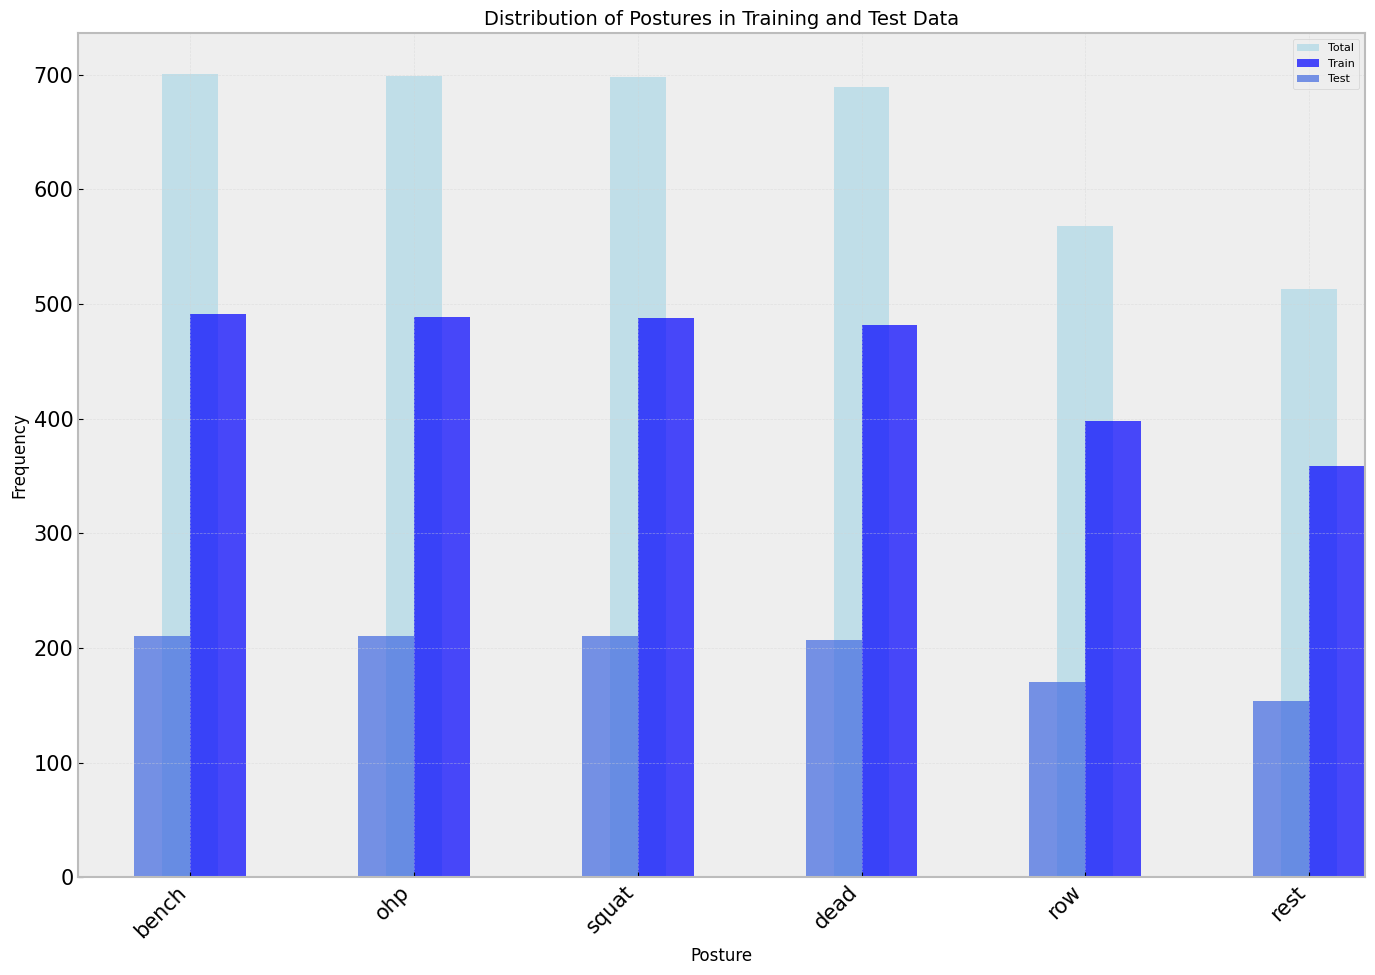

In [16]:
fig, ax = plt.subplots(figsize=(14, 10))
df_train['posture'].value_counts().plot(kind='bar', ax=ax, color='lightblue', alpha=0.7, label="Total", width=0.25)
# Plot value counts for 'y_train' and 'y_test'
y_train.value_counts().plot(kind='bar', ax=ax, color='blue', alpha=0.7, label="Train", width=0.25, position=0)
y_test.value_counts().plot(kind='bar', ax=ax, color='royalblue', alpha=0.7, label="Test", width=0.25, position=1)
ax.set_xlabel("Posture", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_title("Distribution of Postures in Training and Test Data", fontsize=14)
# Add legend and adjust its location
ax.legend(loc='upper right')
ax.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


# Split Feature 

In [17]:
df_train.columns[:20]

Index(['mean_xc', 'mean_yc', 'mean_zc', 'mean_xg', 'mean_yg', 'mean_zg',
       'posture', 'duration_time', 'pca_1', 'pca_2', 'pca_3', 'acc_sqrt',
       'gyro_sqrt', 'mean_xc_temp_mean_ws_5', 'mean_xc_temp_std_ws_5',
       'mean_yc_temp_mean_ws_5', 'mean_yc_temp_std_ws_5',
       'mean_zc_temp_mean_ws_5', 'mean_zc_temp_std_ws_5',
       'mean_xg_temp_mean_ws_5'],
      dtype='object')

In [18]:
df_train.columns[40:]

Index(['mean_xc_max_freq', 'mean_xc_freq_weighted', 'mean_xc_pse',
       'mean_xc_freq_0.0_Hz_ws_14', 'mean_xc_freq_0.357_Hz_ws_14',
       'mean_xc_freq_0.714_Hz_ws_14', 'mean_xc_freq_1.071_Hz_ws_14',
       'mean_xc_freq_1.429_Hz_ws_14', 'mean_xc_freq_1.786_Hz_ws_14',
       'mean_xc_freq_2.143_Hz_ws_14', 'mean_xc_freq_2.5_Hz_ws_14',
       'mean_zc_max_freq', 'mean_zc_freq_weighted', 'mean_zc_pse',
       'mean_zc_freq_0.0_Hz_ws_14', 'mean_zc_freq_0.357_Hz_ws_14',
       'mean_zc_freq_0.714_Hz_ws_14', 'mean_zc_freq_1.071_Hz_ws_14',
       'mean_zc_freq_1.429_Hz_ws_14', 'mean_zc_freq_1.786_Hz_ws_14',
       'mean_zc_freq_2.143_Hz_ws_14', 'mean_zc_freq_2.5_Hz_ws_14',
       'mean_xg_max_freq', 'mean_xg_freq_weighted', 'mean_xg_pse',
       'mean_xg_freq_0.0_Hz_ws_14', 'mean_xg_freq_0.357_Hz_ws_14',
       'mean_xg_freq_0.714_Hz_ws_14', 'mean_xg_freq_1.071_Hz_ws_14',
       'mean_xg_freq_1.429_Hz_ws_14', 'mean_xg_freq_1.786_Hz_ws_14',
       'mean_xg_freq_2.143_Hz_ws_14', 'mean_xg_fre

In [19]:
basic_features = ['mean_xc','mean_yc','mean_zc', 'mean_xg','mean_yg','mean_zg']

In [20]:
sqr_features = ['acc_sqrt', 'gyro_sqrt']

In [21]:
PCA_Features = ['pca_1','pca_2','pca_3']
TIME_Features = [t for t in df_train.columns if '_temp_' in t]
FREQENCY_Features = [f for f in df_train.columns if (('_freq' in f) or ('_pse' in f))]

In [22]:
print ('FREQENCY Features: ', len(FREQENCY_Features))
print ('Time Features: ', len (TIME_Features))

FREQENCY Features:  88
Time Features:  16


In [23]:
Cluster_Features = ['cluster']

In [24]:
features_set_1 = list(set((basic_features)))
features_set_2 = list(set().union(basic_features , sqr_features , PCA_Features))
features_set_3 = list(set().union(basic_features , sqr_features ,PCA_Features , TIME_Features))
features_set_4 = list(set().union(basic_features , sqr_features ,PCA_Features , TIME_Features , FREQENCY_Features , Cluster_Features))

In [25]:
print(features_set_4)

['mean_zg_freq_0.357_Hz_ws_14', 'mean_yg_freq_2.5_Hz_ws_14', 'mean_yc_freq_1.429_Hz_ws_14', 'gyro_sqrt_freq_0.714_Hz_ws_14', 'pca_1', 'mean_xc_freq_weighted', 'mean_yc_freq_2.5_Hz_ws_14', 'mean_xc_freq_0.714_Hz_ws_14', 'mean_xg_pse', 'acc_sqrt_max_freq', 'mean_zg_freq_1.071_Hz_ws_14', 'mean_zc_temp_mean_ws_5', 'mean_xc_freq_0.357_Hz_ws_14', 'mean_yc_freq_0.0_Hz_ws_14', 'gyro_sqrt_freq_weighted', 'acc_sqrt_freq_1.071_Hz_ws_14', 'mean_xc_freq_2.5_Hz_ws_14', 'mean_zg_max_freq', 'mean_zc_freq_2.143_Hz_ws_14', 'mean_yc', 'acc_sqrt_freq_weighted', 'mean_zc', 'mean_yg_temp_mean_ws_5', 'gyro_sqrt_freq_0.357_Hz_ws_14', 'mean_yg', 'gyro_sqrt_max_freq', 'mean_yg_freq_1.786_Hz_ws_14', 'mean_xc_pse', 'mean_zc_temp_std_ws_5', 'mean_zc_freq_0.0_Hz_ws_14', 'mean_zg_pse', 'acc_sqrt_pse', 'mean_zg_freq_2.5_Hz_ws_14', 'mean_xg_freq_0.357_Hz_ws_14', 'mean_xc_temp_std_ws_5', 'mean_xc_freq_2.143_Hz_ws_14', 'mean_zg_freq_1.786_Hz_ws_14', 'mean_xc_freq_1.071_Hz_ws_14', 'cluster', 'pca_3', 'mean_zc_max_freq', 

# Performe Selection using Decision Tree

In [26]:
# selector =  SelectionAlgorithms()
max_features = 10 
# selected_features, ordered_features, ordered_scores = selector.forward_selection(max_features, x_train, y_train)

In [27]:
# output
selected_features = ['mean_yc',
'duration_time',
'mean_xc_freq_0.0_Hz_ws_14',
'mean_zc',
'mean_yc_temp_mean_ws_5',
'gyro_sqrt_freq_0.0_Hz_ws_14',
'mean_zg',
'mean_xc_freq_2.5_Hz_ws_14',
'pca_2',
'gyro_sqrt_freq_1.786_Hz_ws_14']

In [28]:
ordered_features = ['mean_yc',
'duration_time',
'mean_xc_freq_0.0_Hz_ws_14',
'mean_zc',
'mean_yc_temp_mean_ws_5',
'gyro_sqrt_freq_0.0_Hz_ws_14',
'mean_zg',
'mean_xc_freq_2.5_Hz_ws_14',
'pca_2',
'gyro_sqrt_freq_1.786_Hz_ws_14']


In [29]:
ordered_scores = [0.889176209826376,
 0.9770964166974511,
 0.9981529368304396,
 0.9992611747321758,
 0.9996305873660879,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [30]:
# # save the selected features and ordered scores to a file
# with open('../data/external/selected_features.pkl', 'wb') as f:
#     pickle.dump(selected_features, f)

In [31]:
# # save the ordered_features to a file
# with open('../data/external/ordered_features.pkl', 'wb') as f:
#     pickle.dump(ordered_features, f)

In [32]:
# # save the ordered_scores to a file
# with open('../data/external/ordered_scores.pkl', 'wb') as f:
#     pickle.dump(ordered_scores, f)

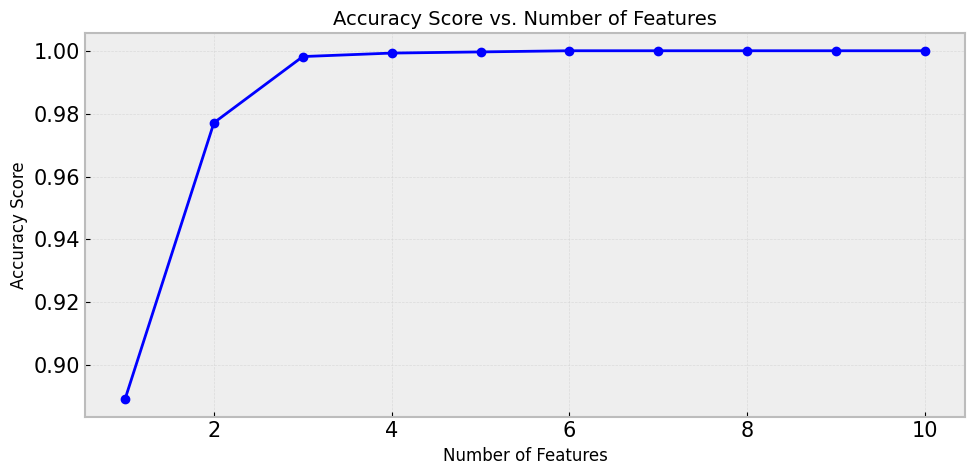

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(1, max_features + 1), ordered_scores, marker='o', color='b', linestyle='-')
ax.set_xlabel("Number of Features", fontsize=12)
ax.set_ylabel("Accuracy Score", fontsize=12)
ax.set_title("Accuracy Score vs. Number of Features", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Grid Search :

In [34]:
possible_feature_set = [features_set_1 , features_set_2 , features_set_3 , features_set_4 , selected_features]

In [35]:
feature_name = ["Features Set 1" , "Features Set 2" , "Features Set 3" , "Features Set 4" , "Selected Features"]

In [36]:
learner  = ClassificationAlgorithms()

In [37]:
iteration = 1
score_df = pd.DataFrame()

In [38]:
for i, f in zip(range(len(possible_feature_set)), feature_name):
    print("Feature set:", i + 1)
    selected_train_X = x_train[possible_feature_set[i]]
    selected_test_X = x_test[possible_feature_set[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iteration):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iteration
    performance_test_rf = performance_test_rf / iteration

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["{Neural Network} - NN", "{Random Forest} - RF", "{K-Nearest Neighbors} - KNN", "{Decision Tree} - DT", "{Naive Bayes} - NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

score_df.sort_values(ascending=False, by="accuracy")

Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 5
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


,model,feature_set,accuracy
3,{Decision Tree} - DT,Selected Features,1.000000
1,{Random Forest} - RF,Features Set 4,0.998277
1,{Random Forest} - RF,Selected Features,0.998277
0,{Neural Network} - NN,Features Set 4,0.993971
0,{Neural Network} - NN,Selected Features,0.993971
1,{Random Forest} - RF,Features Set 3,0.989664
4,{Naive Bayes} - NB,Features Set 4,0.987941
3,{Decision Tree} - DT,Features Set 4,0.986219
0,{Neural Network} - NN,Features Set 3,0.984496
4,{Naive Bayes} - NB,Features Set 3,0.975883


In [39]:
import plotly.express as px
# Calculate standard deviation for error bars
score_df['sd'] = score_df.groupby(['model', 'feature_set'])['accuracy'].transform('std')
color_palette = px.colors.qualitative.Set1
fig = px.bar(score_df, x="model", y="accuracy", color="feature_set",
             barmode="group", error_y="sd", 
             labels={"accuracy": "Accuracy", "model": "Model"},
             title="Comparison of Model Performance",
             color_discrete_sequence=color_palette)
fig.update_layout(
    xaxis=dict(tickangle=-45),
    legend=dict(title="Feature Set", font=dict(size=12)),
    title_font_size=16,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_font_size=14,
    plot_bgcolor='rgba(0,0,0,0)',
    margin=dict(l=50, r=50, t=80, b=50),
)
# Show the plot
fig.show()

# Training Model:
- Model selection based on Posture
- Results Evaluation

# Best model with selected features:

In [40]:
(class_train_y, 
class_test_y , 
class_train_prob_y,
class_test_prob_y) = learner.random_forest(x_train[features_set_4], y_train, x_test[features_set_4], gridsearch=False)
accuracy = accuracy_score(y_test, class_test_y)

In [41]:
accuracy
# Random Forest with Feature Set 4 = 0.9982773471145564
# Random Forest with Selected Features = 1.0 
# Neural Network with Feature Set 4 = 

0.9965546942291128

In [42]:
classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels = classes)

In [43]:
classes

Index(['bench', 'dead', 'ohp', 'rest', 'row', 'squat'], dtype='object')

In [44]:
cm

array([[210,   0,   0,   0,   0,   0],
       [  0, 206,   0,   0,   1,   0],
       [  1,   0, 209,   0,   0,   0],
       [  0,   0,   0, 154,   0,   0],
       [  0,   2,   0,   0, 168,   0],
       [  0,   0,   0,   0,   0, 210]])

In [45]:
class RandomForestTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_estimators=10, min_samples_leaf=5, criterion="gini", gridsearch=True):
        self.n_estimators = n_estimators
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        self.gridsearch = gridsearch

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        classifier = ClassificationAlgorithms()

        # Call the random_forest method with valid data
        (pred_training_y, pred_test_y, frame_prob_training_y, frame_prob_test_y) = classifier.random_forest(
        train_X=x_train,
        train_y=y_train,
        test_X=x_test,
        n_estimators=100,  
        min_samples_leaf=5,  
        criterion="gini",  
        print_model_details=True,  
        gridsearch=True,  
        )
        return pred_training_y, pred_test_y, frame_prob_training_y, frame_prob_test_y

In [46]:
# Define the pipeline
pipeline = Pipeline([
    ('rf_transformer', RandomForestTransformer(n_estimators=50, min_samples_leaf=10, criterion='gini', gridsearch=False))
])
# Train the pipeline
pipeline.fit(x_train, y_train)
# Predict using the pipeline
pred_training_y, pred_test_y, frame_prob_training_y, frame_prob_test_y = pipeline.transform(x_test)

{'criterion': 'gini', 'min_samples_leaf': 2, 'n_estimators': 100}
Feature importance random forest:
gyro_sqrt_freq_0.0_Hz_ws_14
 & 
0.0883256755831554
mean_xc_freq_0.0_Hz_ws_14
 & 
0.06623703162805783
mean_yc_freq_0.0_Hz_ws_14
 & 
0.060526270778982455
mean_xc_temp_mean_ws_5
 & 
0.060073132743686405
mean_zc_freq_0.0_Hz_ws_14
 & 
0.05271240305724475
duration_time
 & 
0.05202980713132865
mean_zg_temp_std_ws_5
 & 
0.050803178290480325
mean_yc
 & 
0.04974447960755309
mean_zc_temp_mean_ws_5
 & 
0.04645052265516723
mean_yc_temp_mean_ws_5
 & 
0.04637257422547815
mean_yc_max_freq
 & 
0.03562663389701993
mean_xc
 & 
0.034922624408634445
cluster
 & 
0.03171922299194544
mean_zc
 & 
0.030883981867024363
gyro_sqrt_temp_mean_ws_5
 & 
0.02578149105277904
gyro_sqrt_temp_std_ws_5
 & 
0.018940875174896787
mean_xc_pse
 & 
0.016291396510662352
mean_zc_pse
 & 
0.015640555655904758
acc_sqrt_pse
 & 
0.013295046005434621
mean_xg_temp_std_ws_5
 & 
0.013247502872966896
mean_yc_temp_std_ws_5
 & 
0.012762639192634

In [47]:
pred_training_y

array(['bench', 'ohp', 'ohp', ..., 'dead', 'dead', 'dead'], dtype=object)

In [48]:
accuracy = accuracy_score(y_test, class_test_y)

In [49]:
accuracy

0.9965546942291128

In [50]:
pipeline

Pipeline(steps=[('rf_transformer',
                 RandomForestTransformer(gridsearch=False, min_samples_leaf=10,
                                         n_estimators=50))])

In [51]:
colorscale = [[0, 'lightgray'], [0.5, 'lightblue'], [1.0, 'darkblue']]
# Create annotations for numerical values in each cell
annotations = []
for i in range(len(classes)):
    for j in range(len(classes)):
        annotations.append(dict(text=str(cm[i, j]),
                                x=classes[j],
                                y=classes[i],
                                xref='x1',
                                yref='y1',
                                font=dict(color='white' if cm[i, j] > cm.max()/2 else 'black'),
                                showarrow=False))

# Create the confusion matrix plot using Plotly
fig = go.Figure(data=go.Heatmap(
    z=cm,
    x=classes,
    y=classes,
    colorscale=colorscale,
    hoverinfo='none'
))
fig.update_layout(annotations=annotations)
fig.update_layout(
    title="Confusion Matrix",
    xaxis=dict(title="Predicted label", tickangle=-45),
    yaxis=dict(title="True label"),
    plot_bgcolor='rgba(0,0,0,0)',
    width=800,
    height=600,
)
# Show the plot
fig.show()

## Select train and test data based on Specimen:

In [52]:
df

,mean_xc,mean_yc,mean_zc,mean_xg,mean_yg,mean_zg,posture,types,specimen,set,...,gyro_sqrt_pse,gyro_sqrt_freq_0.0_Hz_ws_14,gyro_sqrt_freq_0.357_Hz_ws_14,gyro_sqrt_freq_0.714_Hz_ws_14,gyro_sqrt_freq_1.071_Hz_ws_14,gyro_sqrt_freq_1.429_Hz_ws_14,gyro_sqrt_freq_1.786_Hz_ws_14,gyro_sqrt_freq_2.143_Hz_ws_14,gyro_sqrt_freq_2.5_Hz_ws_14,cluster
time,,,,,,,,,,,,,,,,,,,,,
2024-02-11 17:08:08.000,-0.171720,0.899881,-0.169511,3.774166,-9.224335,26.319263,bench,heavy,B,64.0,...,0.400390,169.957158,-22.769665,17.850271,6.699009,-28.838380,1.172824,-28.214163,-6.688060,1
2024-02-11 17:08:08.400,-0.025599,0.868121,-0.058455,6.531859,-2.034554,1.905407,bench,heavy,B,64.0,...,0.338735,193.273377,-16.005057,-42.348706,-21.319861,19.104626,-3.092371,3.106451,-2.540710,1
2024-02-11 17:08:08.800,-0.062526,0.990899,-0.034507,-1.000984,-1.663903,-0.937159,bench,heavy,B,64.0,...,0.382233,189.337639,-24.862902,-32.398674,8.205980,-24.240179,-10.556393,19.848106,-7.164922,1
2024-02-11 17:08:09.200,-0.045753,0.976997,-0.037550,4.534213,-3.075271,2.630137,bench,heavy,B,64.0,...,0.447621,185.520071,-17.510089,48.136639,6.703348,27.660469,14.735488,12.349908,-5.934444,1
2024-02-11 17:08:09.600,-0.046297,0.906045,-0.056705,1.308300,2.464768,-4.722314,bench,heavy,B,64.0,...,0.328161,150.511413,-22.125228,17.002075,-6.599336,-10.310644,8.862907,-13.328693,-15.904520,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-20 19:33:26.200,0.063193,-0.942315,0.107890,-26.048703,8.594212,15.067990,row,medium,E,71.0,...,0.268295,307.024981,10.671412,-45.269619,12.890568,-29.181884,-21.399785,-11.857030,-31.989505,0
2024-02-20 19:33:26.600,-0.023519,-1.200629,-0.109648,-3.410697,-1.614197,6.195765,row,medium,E,71.0,...,0.198346,315.207393,9.031439,-5.194140,-5.327670,15.552368,58.996852,18.923583,2.574359,2
2024-02-20 19:33:27.000,-0.043888,-0.983254,-0.062298,2.477314,-4.130471,0.211078,row,medium,E,71.0,...,0.268683,271.566446,-41.387135,24.866771,-5.636720,3.919922,-42.768100,-0.973890,-2.617110,2


In [53]:
# select train and test data based on specimen 
specimen_df = df.drop(['types', 'set'], axis = 1)

In [54]:
x_train

,mean_xc,mean_yc,mean_zc,mean_xg,mean_yg,mean_zg,duration_time,pca_1,pca_2,pca_3,...,gyro_sqrt_pse,gyro_sqrt_freq_0.0_Hz_ws_14,gyro_sqrt_freq_0.357_Hz_ws_14,gyro_sqrt_freq_0.714_Hz_ws_14,gyro_sqrt_freq_1.071_Hz_ws_14,gyro_sqrt_freq_1.429_Hz_ws_14,gyro_sqrt_freq_1.786_Hz_ws_14,gyro_sqrt_freq_2.143_Hz_ws_14,gyro_sqrt_freq_2.5_Hz_ws_14,cluster
time,,,,,,,,,,,,,,,,,,,,,
2024-02-19 19:24:24.800,-0.016175,0.944473,-0.173792,-9.948980,-1.646907,14.493725,23.0,-16.639171,2.351635,4.608392,...,0.061977,219.635950,-0.064160,6.934320,1.684936,4.592207,-7.110973,3.617241,17.762414,1
2024-02-11 17:41:32.600,-0.240738,1.040016,0.014534,-1.821448,-5.626022,13.272444,12.0,-9.425876,7.942697,4.904422,...,0.200986,367.975517,-37.764614,-21.676892,5.197454,-14.781430,53.790939,-4.063267,11.446856,1
2024-02-11 18:01:05.200,-0.233680,1.030684,-0.157138,-38.623604,-3.414278,12.891274,19.0,-39.290323,-7.725327,-9.997153,...,0.255253,426.069957,58.275150,-18.252144,-3.074810,59.994284,43.107210,-10.344910,2.055202,1
2024-02-11 18:24:33.000,0.042352,-1.252913,-0.024290,11.206853,-1.461637,3.219587,30.0,7.154483,4.638703,6.454902,...,0.444341,192.234091,-48.098520,38.947106,8.747858,-20.366105,2.049400,3.947007,-1.132518,2
2024-02-11 18:09:43.600,-0.185491,0.810341,0.415324,-8.362592,-6.164537,-2.597569,24.0,-5.733359,-1.755125,-8.779388,...,0.160787,107.795509,1.979498,-13.415599,5.723690,-10.170063,-1.602028,-0.883448,-3.638827,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-11 17:42:58.000,-0.353505,0.893875,-0.324972,5.671821,-5.186453,7.667098,18.0,-0.063313,7.677816,4.716951,...,0.439609,289.936329,58.738799,-45.787892,28.534834,42.730193,11.584225,14.085112,4.398359,1
2024-02-19 19:35:01.600,-0.039114,-1.155248,-0.100694,10.345938,-7.478637,-4.165474,20.0,10.449910,5.505005,-2.482672,...,0.426643,257.169724,-21.215103,45.034982,57.334716,-23.375950,19.867441,-4.558036,1.903608,2
2024-02-15 21:30:52.000,0.063822,-1.012565,-0.019018,39.905814,0.395857,0.818665,34.0,32.117444,12.716015,18.473129,...,0.747377,171.056807,71.313550,52.732665,24.501208,-1.101718,-1.320297,-9.877207,5.085758,2


In [55]:
X_train = specimen_df[specimen_df["specimen "] != "A"].drop("posture", axis=1)
y_train = specimen_df[specimen_df["specimen "] != "A"]["posture"]

In [56]:
X_train

,mean_xc,mean_yc,mean_zc,mean_xg,mean_yg,mean_zg,specimen,duration_time,pca_1,pca_2,...,gyro_sqrt_pse,gyro_sqrt_freq_0.0_Hz_ws_14,gyro_sqrt_freq_0.357_Hz_ws_14,gyro_sqrt_freq_0.714_Hz_ws_14,gyro_sqrt_freq_1.071_Hz_ws_14,gyro_sqrt_freq_1.429_Hz_ws_14,gyro_sqrt_freq_1.786_Hz_ws_14,gyro_sqrt_freq_2.143_Hz_ws_14,gyro_sqrt_freq_2.5_Hz_ws_14,cluster
time,,,,,,,,,,,,,,,,,,,,,
2024-02-11 17:08:08.000,-0.171720,0.899881,-0.169511,3.774166,-9.224335,26.319263,B,16.0,-12.431003,19.194352,...,0.400390,169.957158,-22.769665,17.850271,6.699009,-28.838380,1.172824,-28.214163,-6.688060,1
2024-02-11 17:08:08.400,-0.025599,0.868121,-0.058455,6.531859,-2.034554,1.905407,B,16.0,4.051732,2.714509,...,0.338735,193.273377,-16.005057,-42.348706,-21.319861,19.104626,-3.092371,3.106451,-2.540710,1
2024-02-11 17:08:08.800,-0.062526,0.990899,-0.034507,-1.000984,-1.663903,-0.937159,B,16.0,-0.483603,-1.765676,...,0.382233,189.337639,-24.862902,-32.398674,8.205980,-24.240179,-10.556393,19.848106,-7.164922,1
2024-02-11 17:08:09.200,-0.045753,0.976997,-0.037550,4.534213,-3.075271,2.630137,B,16.0,1.961752,3.143719,...,0.447621,185.520071,-17.510089,48.136639,6.703348,27.660469,14.735488,12.349908,-5.934444,1
2024-02-11 17:08:09.600,-0.046297,0.906045,-0.056705,1.308300,2.464768,-4.722314,B,16.0,3.725008,-6.004046,...,0.328161,150.511413,-22.125228,17.002075,-6.599336,-10.310644,8.862907,-13.328693,-15.904520,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-20 19:33:26.200,0.063193,-0.942315,0.107890,-26.048703,8.594212,15.067990,E,19.0,-29.785541,-11.486676,...,0.268295,307.024981,10.671412,-45.269619,12.890568,-29.181884,-21.399785,-11.857030,-31.989505,0
2024-02-20 19:33:26.600,-0.023519,-1.200629,-0.109648,-3.410697,-1.614197,6.195765,E,19.0,-6.533553,0.745641,...,0.198346,315.207393,9.031439,-5.194140,-5.327670,15.552368,58.996852,18.923583,2.574359,2
2024-02-20 19:33:27.000,-0.043888,-0.983254,-0.062298,2.477314,-4.130471,0.211078,E,19.0,1.621374,2.037572,...,0.268683,271.566446,-41.387135,24.866771,-5.636720,3.919922,-42.768100,-0.973890,-2.617110,2


In [57]:
y_train

time
2024-02-11 17:08:08.000    bench
2024-02-11 17:08:08.400    bench
2024-02-11 17:08:08.800    bench
2024-02-11 17:08:09.200    bench
2024-02-11 17:08:09.600    bench
                           ...  
2024-02-20 19:33:26.200      row
2024-02-20 19:33:26.600      row
2024-02-20 19:33:27.000      row
2024-02-20 19:33:27.400      row
2024-02-20 19:33:27.800      row
Name: posture, Length: 2576, dtype: object

In [58]:
X_test = specimen_df[specimen_df["specimen "] == "A"].drop("posture", axis=1)
y_test = specimen_df[specimen_df["specimen "] == "A"]["posture"]

In [59]:
X_test

,mean_xc,mean_yc,mean_zc,mean_xg,mean_yg,mean_zg,specimen,duration_time,pca_1,pca_2,...,gyro_sqrt_pse,gyro_sqrt_freq_0.0_Hz_ws_14,gyro_sqrt_freq_0.357_Hz_ws_14,gyro_sqrt_freq_0.714_Hz_ws_14,gyro_sqrt_freq_1.071_Hz_ws_14,gyro_sqrt_freq_1.429_Hz_ws_14,gyro_sqrt_freq_1.786_Hz_ws_14,gyro_sqrt_freq_2.143_Hz_ws_14,gyro_sqrt_freq_2.5_Hz_ws_14,cluster
time,,,,,,,,,,,,,,,,,,,,,
2024-02-11 17:10:11.400,-0.013629,0.908730,-0.154034,13.611449,-4.761109,-14.207999,A,16.0,18.966609,-0.285670,...,0.192616,217.390890,1.376301,-13.345730,13.129815,-16.673926,-27.915108,-13.589828,-4.249310,1
2024-02-11 17:10:11.800,-0.102969,0.848326,-0.212458,6.646592,-7.122734,-2.312106,A,16.0,6.370043,4.743019,...,0.178713,224.707372,8.161767,15.196016,-26.590310,10.055794,1.229475,18.043732,11.030150,1
2024-02-11 17:10:12.200,-0.114401,1.060941,-0.165265,-6.298785,-4.747769,7.061916,A,16.0,-9.512490,2.570603,...,0.135649,212.174589,-7.812215,-1.421982,23.371483,-8.741218,16.647744,7.917960,2.590961,1
2024-02-11 17:10:12.600,-0.177703,0.964049,-0.201222,8.180815,0.708895,-3.592701,A,16.0,8.647378,-1.502636,...,0.237445,192.750826,-20.497333,-5.085788,9.165917,29.809915,-2.616067,-10.403365,-12.869317,1
2024-02-11 17:10:13.000,-0.171088,0.937612,-0.211338,-10.989292,2.514954,13.332220,A,16.0,-16.674884,-1.892673,...,0.294937,185.248137,-5.390706,21.899955,-14.738043,-26.741409,2.920251,-5.584894,-23.158402,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-19 19:26:17.800,0.191086,-0.877134,0.458199,20.118215,4.305490,-9.056804,A,39.0,21.688950,-2.543218,...,0.175088,421.016346,-35.832326,39.834770,-2.750613,-36.054823,-35.056054,2.895977,1.161118,0
2024-02-19 19:26:18.200,0.161758,-0.829822,0.514367,-17.204426,24.853371,-0.978171,A,39.0,-12.765038,-28.822814,...,0.334950,405.924904,-64.424707,75.660382,5.214128,45.592151,2.772917,19.287441,-6.059831,0
2024-02-19 19:26:18.600,0.200410,-0.884568,0.516035,-1.523450,25.732533,-25.981639,A,39.0,14.414987,-35.770817,...,0.170478,424.436721,-18.880915,-30.114693,10.976600,-46.789290,28.643061,-2.504014,-28.109900,0


In [60]:
y_test

time
2024-02-11 17:10:11.400    bench
2024-02-11 17:10:11.800    bench
2024-02-11 17:10:12.200    bench
2024-02-11 17:10:12.600    bench
2024-02-11 17:10:13.000    bench
                           ...  
2024-02-19 19:26:17.800     rest
2024-02-19 19:26:18.200     rest
2024-02-19 19:26:18.600     rest
2024-02-19 19:26:19.000     rest
2024-02-19 19:26:19.400     rest
Name: posture, Length: 1292, dtype: object

In [61]:
X_train = X_train.drop("specimen ", axis=1)
X_test = X_test.drop("specimen ", axis=1)

In [62]:
X_train

,mean_xc,mean_yc,mean_zc,mean_xg,mean_yg,mean_zg,duration_time,pca_1,pca_2,pca_3,...,gyro_sqrt_pse,gyro_sqrt_freq_0.0_Hz_ws_14,gyro_sqrt_freq_0.357_Hz_ws_14,gyro_sqrt_freq_0.714_Hz_ws_14,gyro_sqrt_freq_1.071_Hz_ws_14,gyro_sqrt_freq_1.429_Hz_ws_14,gyro_sqrt_freq_1.786_Hz_ws_14,gyro_sqrt_freq_2.143_Hz_ws_14,gyro_sqrt_freq_2.5_Hz_ws_14,cluster
time,,,,,,,,,,,,,,,,,,,,,
2024-02-11 17:08:08.000,-0.171720,0.899881,-0.169511,3.774166,-9.224335,26.319263,16.0,-12.431003,19.194352,13.784280,...,0.400390,169.957158,-22.769665,17.850271,6.699009,-28.838380,1.172824,-28.214163,-6.688060,1
2024-02-11 17:08:08.400,-0.025599,0.868121,-0.058455,6.531859,-2.034554,1.905407,16.0,4.051732,2.714509,3.197879,...,0.338735,193.273377,-16.005057,-42.348706,-21.319861,19.104626,-3.092371,3.106451,-2.540710,1
2024-02-11 17:08:08.800,-0.062526,0.990899,-0.034507,-1.000984,-1.663903,-0.937159,16.0,-0.483603,-1.765676,-1.733883,...,0.382233,189.337639,-24.862902,-32.398674,8.205980,-24.240179,-10.556393,19.848106,-7.164922,1
2024-02-11 17:08:09.200,-0.045753,0.976997,-0.037550,4.534213,-3.075271,2.630137,16.0,1.961752,3.143719,2.174345,...,0.447621,185.520071,-17.510089,48.136639,6.703348,27.660469,14.735488,12.349908,-5.934444,1
2024-02-11 17:08:09.600,-0.046297,0.906045,-0.056705,1.308300,2.464768,-4.722314,16.0,3.725008,-6.004046,-0.718233,...,0.328161,150.511413,-22.125228,17.002075,-6.599336,-10.310644,8.862907,-13.328693,-15.904520,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-20 19:33:26.200,0.063193,-0.942315,0.107890,-26.048703,8.594212,15.067990,19.0,-29.785541,-11.486676,4.242451,...,0.268295,307.024981,10.671412,-45.269619,12.890568,-29.181884,-21.399785,-11.857030,-31.989505,0
2024-02-20 19:33:26.600,-0.023519,-1.200629,-0.109648,-3.410697,-1.614197,6.195765,19.0,-6.533553,0.745641,1.978572,...,0.198346,315.207393,9.031439,-5.194140,-5.327670,15.552368,58.996852,18.923583,2.574359,2
2024-02-20 19:33:27.000,-0.043888,-0.983254,-0.062298,2.477314,-4.130471,0.211078,19.0,1.621374,2.037572,-0.961822,...,0.268683,271.566446,-41.387135,24.866771,-5.636720,3.919922,-42.768100,-0.973890,-2.617110,2


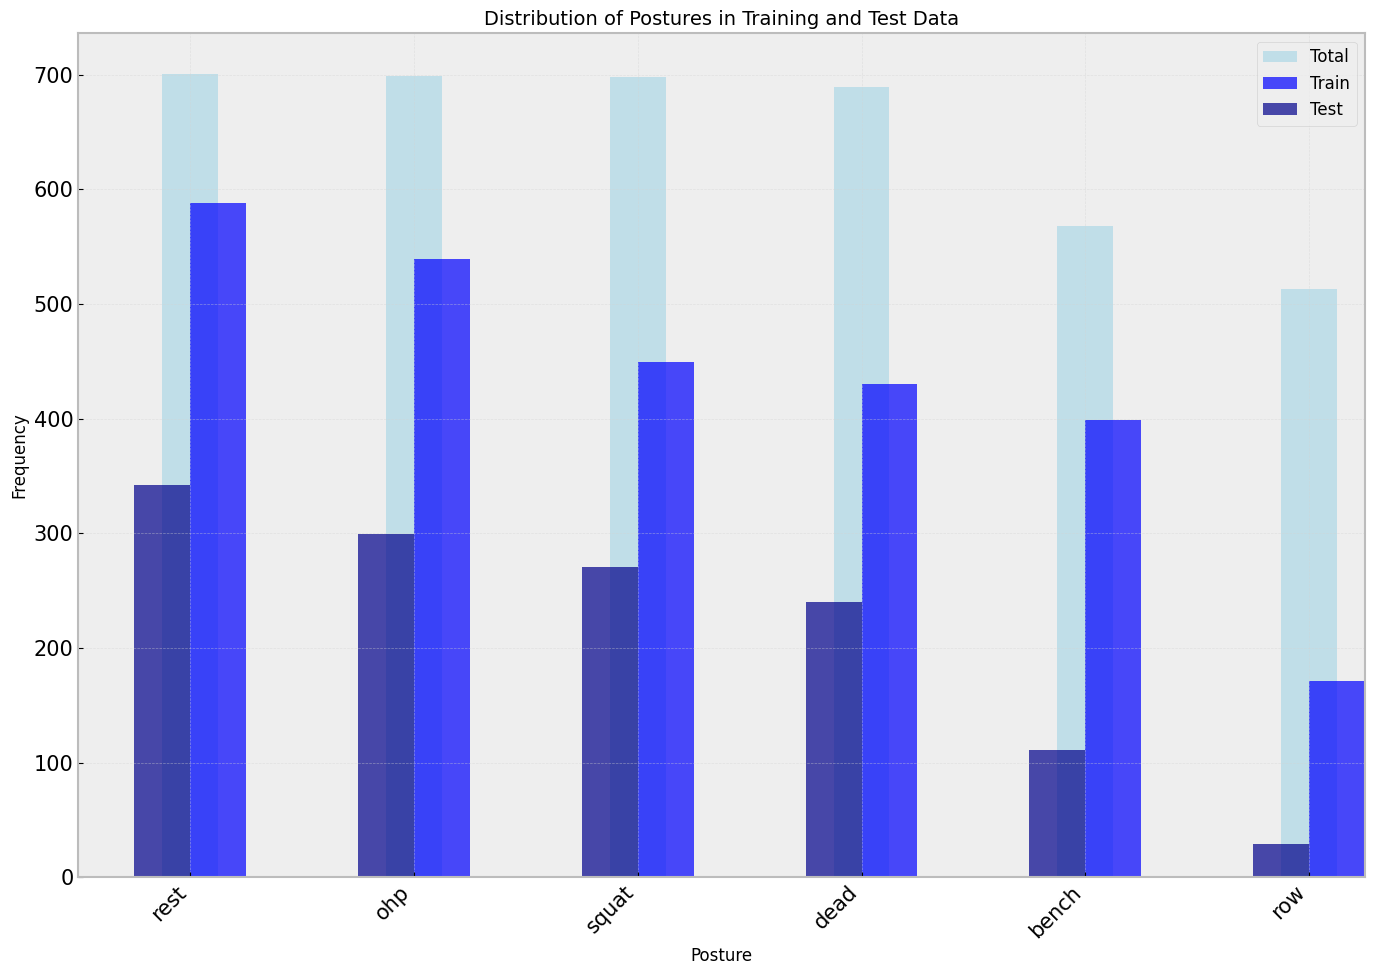

In [63]:
fig, ax = plt.subplots(figsize=(14, 10))
specimen_df["posture"].value_counts().plot(kind="bar", color="lightblue", ax=ax, alpha=0.7, label="Total", width=0.25)
y_train.value_counts().plot(kind="bar", ax=ax, color="blue", alpha=0.7, label="Train", width=0.25, position=0)
y_test.value_counts().plot(kind="bar", ax=ax, color="darkblue", alpha=0.7, label="Test", width=0.25, position=1)
ax.set_xlabel("Posture", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_title("Distribution of Postures in Training and Test Data", fontsize=14)
ax.legend(loc="upper right", fontsize=12)
ax.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45, ha="right")
# Show plot
plt.tight_layout()
plt.show()

## Evaluate Model again with best model:

In [64]:
(class_train_y, 
class_test_y , 
class_train_prob_y,
class_test_prob_y) = learner.random_forest(X_train[features_set_4], y_train, X_test[features_set_4], gridsearch=True)
accuracy = accuracy_score(y_test, class_test_y)

In [65]:
accuracy

1.0

In [66]:
classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels = classes)

In [67]:
cm

array([[111,   0,   0,   0,   0,   0],
       [  0, 240,   0,   0,   0,   0],
       [  0,   0, 299,   0,   0,   0],
       [  0,   0,   0, 342,   0,   0],
       [  0,   0,   0,   0,  29,   0],
       [  0,   0,   0,   0,   0, 271]])

In [68]:
colorscale = [[0, 'lightgray'], [0.5, 'lightblue'], [1.0, 'darkblue']]
# Create annotations for numerical values in each cell
annotations = []
for i in range(len(classes)):
    for j in range(len(classes)):
        annotations.append(dict(text=str(cm[i, j]),
                                x=classes[j],
                                y=classes[i],
                                xref='x1',
                                yref='y1',
                                font=dict(color='white' if cm[i, j] > cm.max()/2 else 'black'),
                                showarrow=False))

# Create the confusion matrix plot using Plotly
fig = go.Figure(data=go.Heatmap(
    z=cm,
    x=classes,
    y=classes,
    colorscale=colorscale,
    hoverinfo='none'
))
fig.update_layout(annotations=annotations)
fig.update_layout(
    title="Confusion Matrix",
    xaxis=dict(title="Predicted label", tickangle=-45),
    yaxis=dict(title="True label"),
    plot_bgcolor='rgba(0,0,0,0)',
    width=800,
    height=600,
)
# Show the plot
fig.show()

## Simple Model:

In [69]:
(class_train_y, 
class_test_y , 
class_train_prob_y,
class_test_prob_y) = learner.k_nearest_neighbor(X_train[features_set_2], y_train, X_test[features_set_2], gridsearch=False)
accuracy = accuracy_score(y_test, class_test_y)

In [70]:
accuracy

0.5890092879256966

In [71]:
classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels = classes)

In [72]:
cm

array([[ 84,   4,   6,   0,   6,  11],
       [ 19, 150,   2,   1,  40,  28],
       [ 88,  15, 149,   2,  30,  15],
       [ 36,  36,  50, 176,  26,  18],
       [  1,   5,   0,   0,  23,   0],
       [ 36,  38,   3,   0,  15, 179]])

In [73]:
colorscale = [[0, 'lightgray'], [0.5, 'lightblue'], [1.0, 'darkblue']]
# Create annotations for numerical values in each cell
annotations = []
for i in range(len(classes)):
    for j in range(len(classes)):
        annotations.append(dict(text=str(cm[i, j]),
                                x=classes[j],
                                y=classes[i],
                                xref='x1',
                                yref='y1',
                                font=dict(color='white' if cm[i, j] > cm.max()/2 else 'black'),
                                showarrow=False))

# Create the confusion matrix plot using Plotly
fig = go.Figure(data=go.Heatmap(
    z=cm,
    x=classes,
    y=classes,
    colorscale=colorscale,
    hoverinfo='none'
))
fig.update_layout(annotations=annotations)
fig.update_layout(
    title="Confusion Matrix",
    xaxis=dict(title="Predicted label", tickangle=-45),
    yaxis=dict(title="True label"),
    plot_bgcolor='rgba(0,0,0,0)',
    width=800,
    height=600,
)
# Show the plot
fig.show()

- simple model with feature set 2 are so bad accuracy also confusing result

# Ml- flow